In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

plt.rcParams["figure.figsize"] = (40,40)

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime 

In [2]:
df = pd.read_pickle("datos/bikes_clean_pickle.pkl")
df.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654
1,2018-01-02,winter,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670
2,2018-01-03,winter,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229
3,2018-01-04,winter,0,1,0,2,1,1,8.200000,59.0435,10.739832,108,1454
4,2018-01-05,winter,0,1,0,3,1,1,9.305237,43.6957,12.522300,82,1518


In [3]:
df.sample(10)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
279,2018-10-07,autumn,0,10,0,5,1,1,20.944153,68.4167,1.500244,949,4036
467,2019-04-13,spring,1,4,0,5,1,1,18.142500,40.8333,10.416557,1252,5146
125,2018-05-06,spring,0,5,0,5,1,1,19.645847,59.0000,15.292482,894,3714
191,2018-07-11,summer,0,7,0,1,1,1,31.262500,63.5833,18.916579,723,3363
369,2019-01-05,winter,1,1,0,4,1,1,10.899153,52.4167,8.709129,140,3132
716,2019-12-18,autumn,1,12,0,2,1,1,16.844153,66.6250,14.834068,433,5124
176,2018-06-26,summer,0,6,0,0,0,1,27.880000,51.3333,6.333731,1920,3385
161,2018-06-11,spring,0,6,0,6,0,1,29.725000,65.4583,10.374950,1729,3237
613,2019-09-06,summer,1,9,0,4,1,2,28.563347,81.0417,9.542207,611,5592
197,2018-07-17,summer,0,7,0,0,0,1,29.485847,60.4167,16.417211,2006,3296


In [4]:
cal = calendar() #llamada al calendario
holidays = cal.holidays(start=df['date'].min(), end=df['date'].max())

df['holiday'] = df['date'].isin(holidays)

In [5]:
festivos = df[df['holiday'] == True]
festivos

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,True,6,0,2,14.110847,80.5833,10.749882,331,654
14,2018-01-15,winter,0,1,True,6,0,2,9.566653,49.8750,10.583521,222,1026
49,2018-02-19,winter,0,2,True,6,0,1,16.365847,18.7917,34.000021,532,1103
147,2018-05-28,spring,0,5,True,6,0,1,26.889153,72.9583,15.416164,2001,2757
184,2018-07-04,summer,0,7,True,1,0,2,29.793347,63.7917,5.459106,3065,2978
245,2018-09-03,summer,0,9,True,6,0,1,27.435847,71.6667,12.416775,1935,2549
280,2018-10-08,autumn,0,10,True,6,0,1,21.388347,70.1250,3.042081,2235,3174
315,2018-11-12,autumn,0,11,True,6,0,1,14.623347,55.2917,14.208154,1275,2792
325,2018-11-22,autumn,0,11,True,2,1,3,17.083347,96.2500,7.959064,69,1538
358,2018-12-25,winter,0,12,True,0,0,1,11.266103,68.1304,10.391097,303,451


In [6]:
festivos.shape

(20, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   year        730 non-null    int64         
 3   month       730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weather     730 non-null    int64         
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 79.8+ KB


In [8]:
df.sample(10)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
302,2018-10-30,autumn,0,10,False,0,0,1,13.085847,62.3750,11.833339,885,2446
588,2019-08-12,summer,1,8,False,0,0,1,28.734153,53.0417,8.208304,2182,4362
408,2019-02-13,winter,1,2,False,1,1,1,9.122500,41.1250,11.207961,94,3328
315,2018-11-12,autumn,0,11,True,6,0,1,14.623347,55.2917,14.208154,1275,2792
589,2019-08-13,summer,1,8,False,1,1,1,29.554153,54.5417,9.126204,1207,5676
384,2019-01-20,winter,1,1,False,5,1,2,8.917500,45.0000,13.584250,115,3048
170,2018-06-20,spring,0,6,False,1,1,2,26.035000,74.6250,10.416825,699,3311
571,2019-07-26,summer,1,7,False,4,1,1,31.843347,59.6667,19.082471,1036,5825
491,2019-05-07,spring,1,5,False,1,1,2,22.037500,66.4167,15.458307,1008,5265
624,2019-09-17,summer,1,9,False,1,1,2,23.814153,73.4583,10.166714,1022,5847


In [9]:
festivos = df[df['holiday'] == 1]
festivos

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,True,6,0,2,14.110847,80.5833,10.749882,331,654
14,2018-01-15,winter,0,1,True,6,0,2,9.566653,49.8750,10.583521,222,1026
49,2018-02-19,winter,0,2,True,6,0,1,16.365847,18.7917,34.000021,532,1103
147,2018-05-28,spring,0,5,True,6,0,1,26.889153,72.9583,15.416164,2001,2757
184,2018-07-04,summer,0,7,True,1,0,2,29.793347,63.7917,5.459106,3065,2978
245,2018-09-03,summer,0,9,True,6,0,1,27.435847,71.6667,12.416775,1935,2549
280,2018-10-08,autumn,0,10,True,6,0,1,21.388347,70.1250,3.042081,2235,3174
315,2018-11-12,autumn,0,11,True,6,0,1,14.623347,55.2917,14.208154,1275,2792
325,2018-11-22,autumn,0,11,True,2,1,3,17.083347,96.2500,7.959064,69,1538
358,2018-12-25,winter,0,12,True,0,0,1,11.266103,68.1304,10.391097,303,451


In [ ]:
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [ ]:
df.groupby('holiday')['registered', 'casual'].mean().reset_index()


,holiday,registered,casual
0,0,3688.035261,842.867419
1,1,2670.285714,1064.714286


In [ ]:
df.groupby('holiday')['registered', 'casual'].median().reset_index()

,holiday,registered,casual
0,0,3694.0,713.0
1,1,2549.0,874.0


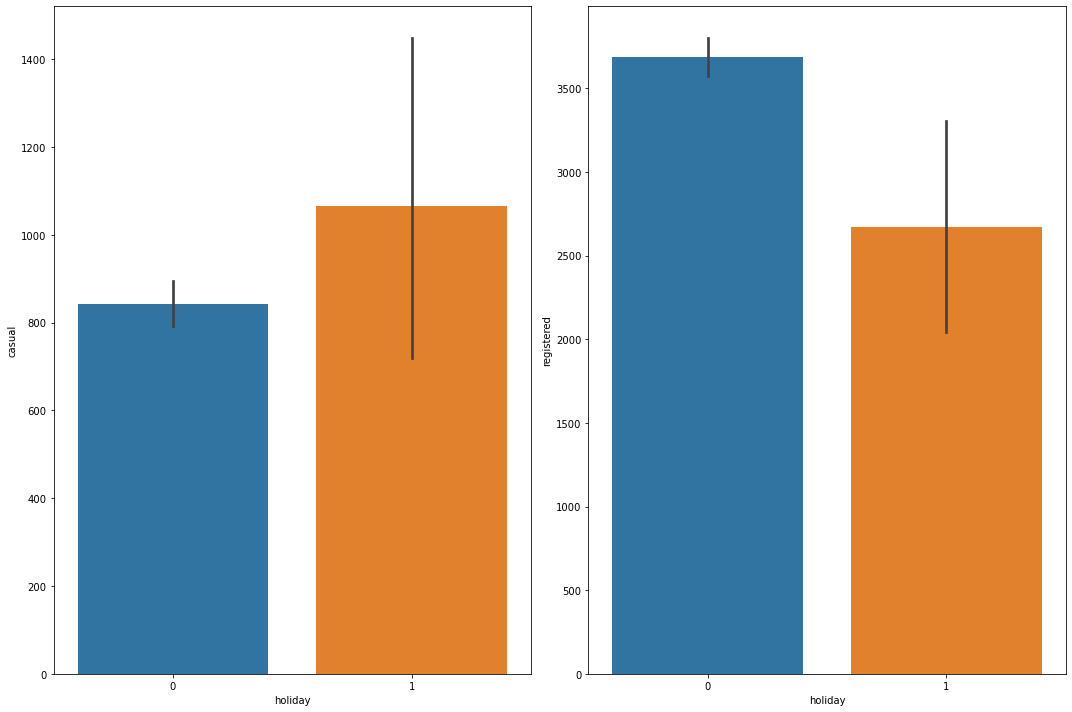

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

axes = axes.flat

for indice, columna in enumerate(df.columns[-2:]):

    sns.barplot(x = 'holiday', y =df[columna], data=df, ax= axes[indice])

plt.tight_layout();


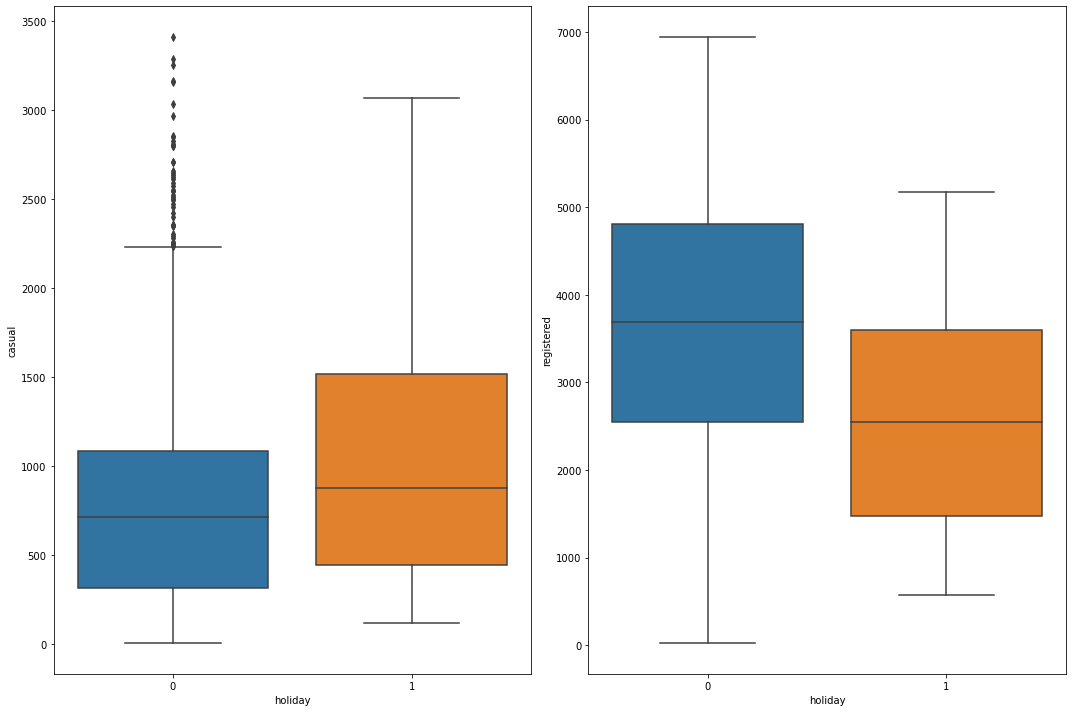

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

axes = axes.flat

for indice, columna in enumerate(df.columns[-2:]):

    sns.boxplot(x = 'holiday', y =df[columna], data=df, ax= axes[indice])

plt.tight_layout();

In [ ]:
#df['holiday'] =0

In [ ]:
#lista_festivos_bien = ['2018-01-01' ,'2018-01-15', '2018-02-19', '2018-04-01', '2018-04-16','2018-05-13', '2018-05-28', '2018-06-17','2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12', '2018-11-22', '2018-12-05', '2018-12-24','2018-12-25', '2019-01-01', '2019-01-21', '2019-04-16', '2019-04-21','2019-05-12', '2019-05-27', '2019-06-16','2019-07-04', '2019-09-02', '2019-10-14', '2019-11-28', '2019-12-24', '2019-12-25']

In [ ]:
#df.loc[df['dteday'].isin(lista_festivos_bien), "holiday"] = 1

In [ ]:
#df['holiday'].value_counts()

0    701
1     29
Name: holiday, dtype: int64

In [10]:
df["weekday"]= df["date"].dt.day_name()

In [13]:
df.sample(10)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
353,2018-12-20,autumn,0,12,False,Thursday,1,2,15.819153,59.5417,4.125244,216,3534
197,2018-07-17,summer,0,7,False,Tuesday,0,1,29.485847,60.4167,16.417211,2006,3296
531,2019-06-16,spring,1,6,False,Sunday,0,1,25.898347,50.4167,11.166689,2963,4739
347,2018-12-14,autumn,0,12,False,Friday,1,2,13.017500,66.3750,4.084206,178,3562
702,2019-12-04,autumn,1,12,False,Wednesday,1,1,19.509153,73.3750,11.666643,551,6055
692,2019-11-24,autumn,1,11,False,Sunday,0,1,11.411653,40.4583,25.250357,532,1745
381,2019-01-17,winter,1,1,False,Thursday,1,2,15.294763,71.6087,23.391710,127,2808
593,2019-08-17,summer,1,8,False,Saturday,1,1,29.656653,57.0833,15.500718,1483,5665
562,2019-07-17,summer,1,7,False,Wednesday,1,1,33.551653,50.5833,7.666743,921,5865
679,2019-11-11,autumn,1,11,True,Monday,0,1,17.254153,65.9167,8.542500,2290,4562


In [ ]:
df['dteday_year'] = df['dteday'].str.split('-', expand=True).get(2)
df_yr_0 = df[df['yr'] == 0]
df_yr_1 = df[df['yr'] == 1]
print(f'Filtrando por yr=0 (año 2018) los valores únicos de año de "dteday_year" son: {df_yr_0.dteday_year.unique()}')
print(f'Filtrando por yr=1 (año 2019) los valores únicos de año de "dteday_year" son: {df_yr_1.dteday_year.unique()}')

In [ ]:
df['weather'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [ ]:
df.groupby('weather')['registered', 'casual'].mean().reset_index()

,weathersit,registered,casual
0,1,3912.755940,964.030238
1,2,3354.930894,689.882114
2,3,1617.809524,185.476190


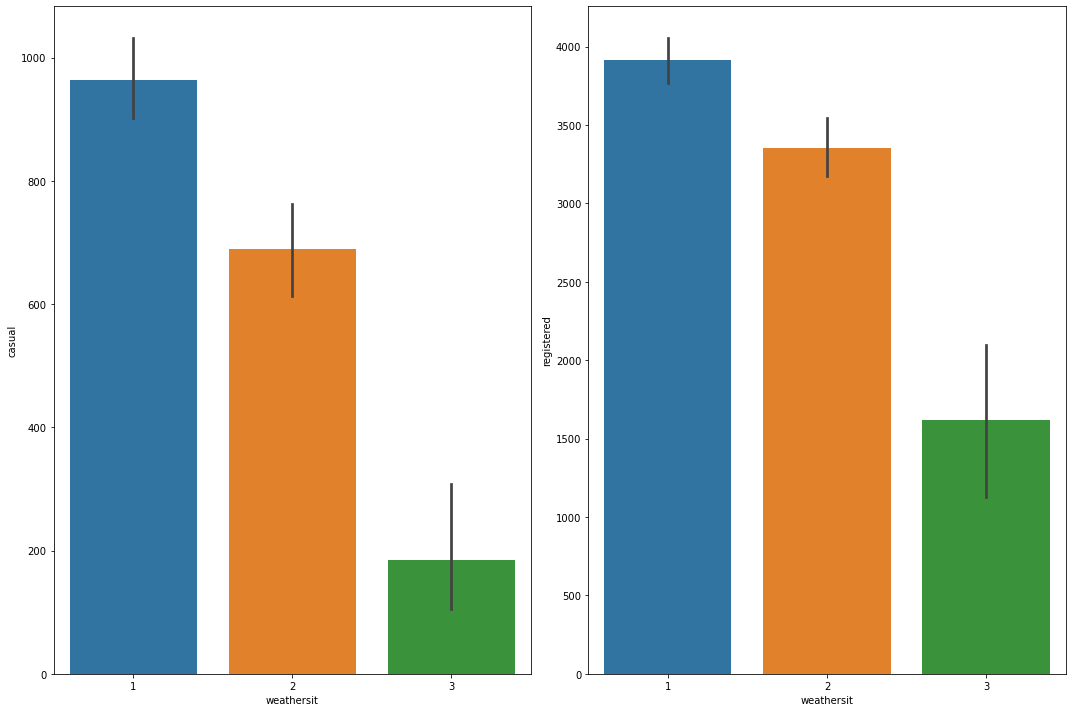

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

axes = axes.flat

for indice, columna in enumerate(df.columns[-2:]):

    sns.barplot(x = 'weather', y =df[columna], data=df, ax= axes[indice])

plt.tight_layout();

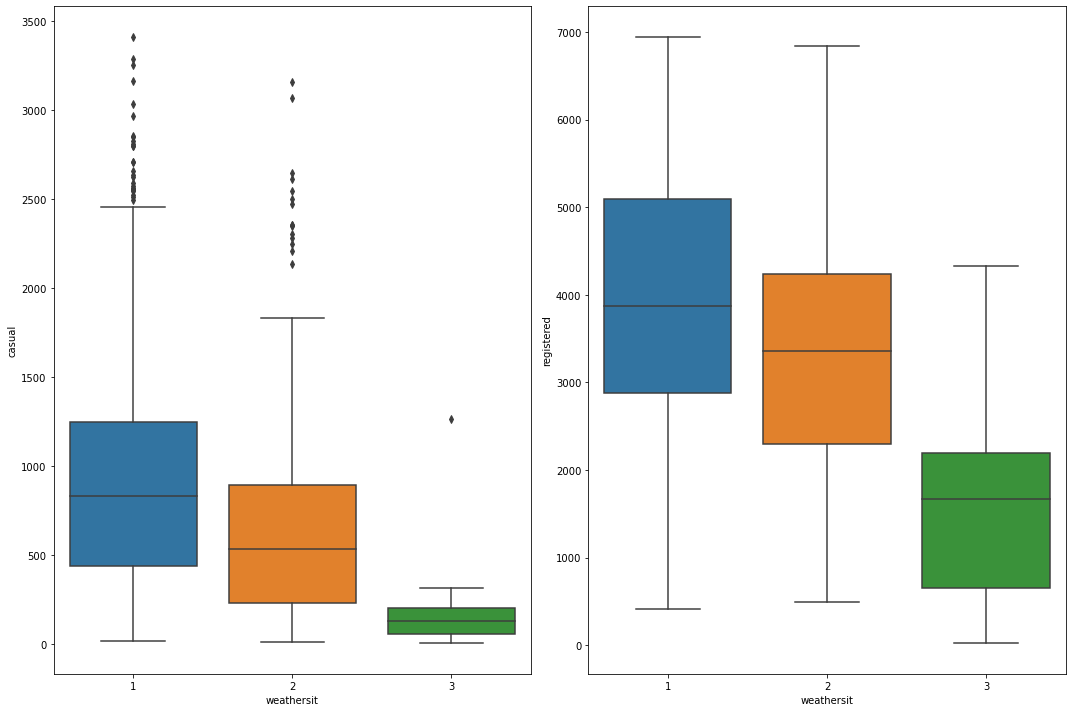

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

axes = axes.flat

for indice, columna in enumerate(df.columns[-2:]):

    sns.boxplot(x = 'weather', y =df[columna], data=df, ax= axes[indice])

plt.tight_layout();

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 96.0+ KB
